# Hierarchical Clustering :

In [1]:
# Import library :
import pandas as pd
import numpy as np

In [2]:
# Import scipy libary :
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Example data :
np.random.seed(0)
X = np.vstack((np.random.normal(0, 1, (100, 2)),
             np.random.normal(5, 1, (100, 2)),
             np.random.normal(-5, 1, (100, 2))))

In [6]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [7]:
# Performing hierarchical clustering :
Z = linkage(X, method="ward")
Z

array([[3.00000000e+00, 5.80000000e+01, 4.62482589e-03, 2.00000000e+00],
       [1.20000000e+02, 1.37000000e+02, 1.62502365e-02, 2.00000000e+00],
       [6.00000000e+01, 6.90000000e+01, 2.05817677e-02, 2.00000000e+00],
       ...,
       [5.87000000e+02, 5.92000000e+02, 1.27725239e+01, 1.00000000e+02],
       [5.94000000e+02, 5.95000000e+02, 6.79022063e+01, 2.00000000e+02],
       [5.96000000e+02, 5.97000000e+02, 1.23769372e+02, 3.00000000e+02]])

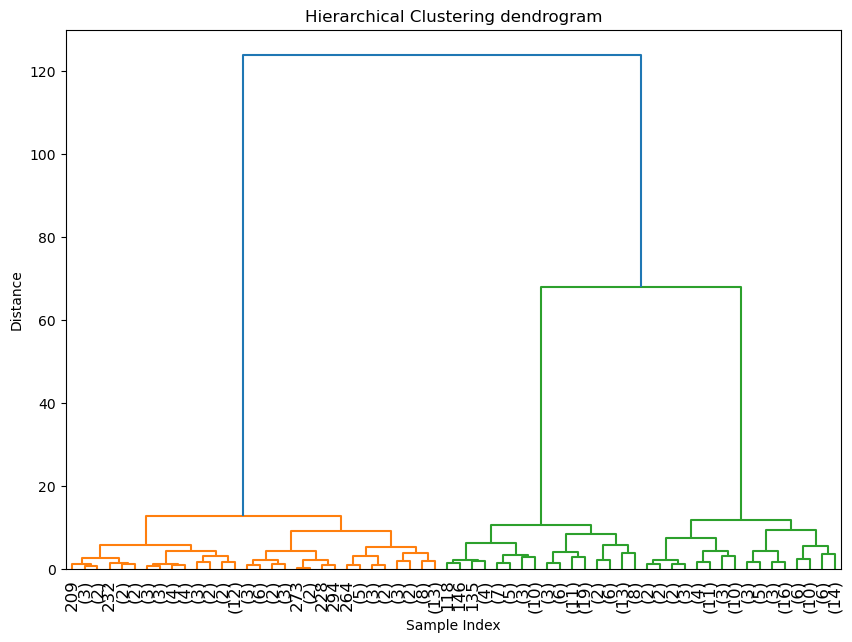

In [8]:
# Plotting the dendrogram :
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode="level", p=5, leaf_rotation=90.,
          leaf_font_size=12., show_contracted=True)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering dendrogram")
plt.show()

In [11]:
# Cutting the dendrogram to from clusters :
max_d = 7.0   # Example threshold for cutting the dendrogram.
clusters = fcluster(Z, max_d, criterion="distance")

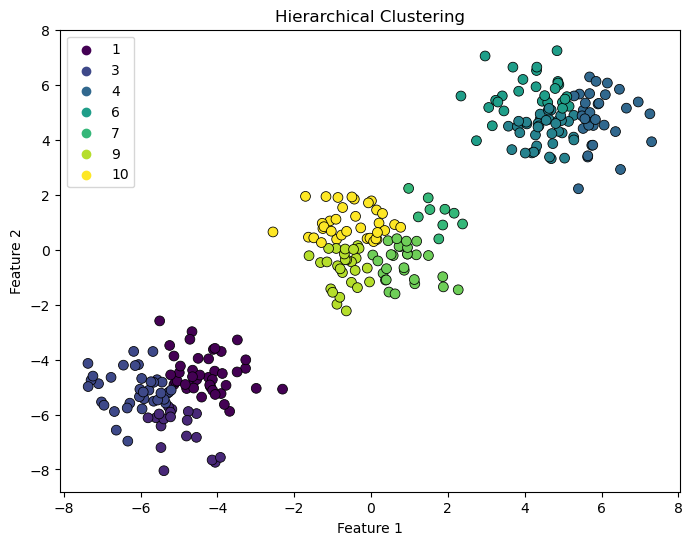

In [12]:
# Lets plot the clusters :
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette="viridis",
               s=50, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Hierarchical Clustering")
plt.show()

==> 𝐂𝐨𝐧𝐜𝐞𝐩𝐭: Hierarchical clustering is an unsupervised learning algorithm used to build a hierarchy of clusters. It seeks to create a tree of clusters called a dendrogram, which can then be used to decide the level at which to cut the tree to form clusters. 
There are two main types of hierarchical clustering:

𝟏.  𝐀𝐠𝐠𝐥𝐨𝐦𝐞𝐫𝐚𝐭𝐢𝐯𝐞 𝐇𝐢𝐞𝐫𝐚𝐫𝐜𝐡𝐢𝐜𝐚𝐥 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 (𝐁𝐨𝐭𝐭𝐨𝐦-𝐔𝐩):
    
- Starts with each data point as a single cluster.
- Iteratively merges the closest pairs of clusters until all points are in a single cluster or the 
    desired number of clusters is reached.
    
𝟐. 𝐃𝐢𝐯𝐢𝐬𝐢𝐯𝐞 𝐇𝐢𝐞𝐫𝐚𝐫𝐜𝐡𝐢𝐜𝐚𝐥 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 (𝐓𝐨𝐩-𝐃𝐨𝐰𝐧):
- Starts with all data points in a single cluster.
- Iteratively splits the most heterogeneous cluster until each data point is in its own cluster or the desired number of clusters is reached.

𝐂𝐡𝐨𝐨𝐬𝐢𝐧𝐠 𝐭𝐡𝐞 𝐍𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐬:

The dendrogram helps visualize the hierarchy of clusters. The choice of where to cut the dendrogram (i.e., selecting a threshold distance) determines the number of clusters. This choice can be subjective, but some guidelines include:
- 𝐄𝐥𝐛𝐨𝐰 𝐌𝐞𝐭𝐡𝐨𝐝: Similar to k-Means, look for an "elbow" in the dendrogram where the distance between merges increases significantly.
- 𝐌𝐚𝐱𝐢𝐦𝐮𝐦 𝐃𝐢𝐬𝐭𝐚𝐧𝐜𝐞: Choose a distance threshold that balances the number of clusters and the compactness of clusters.